<a href="https://colab.research.google.com/github/xiscoding/utils/blob/main/nisq_frequency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install astral

In [ ]:
from astral import LocationInfo, sun
cities_info = {
    "Longyearbyen": {"country": "Norway", "latitude": 78.2232, "longitude": 15.6267},
    "Macapá": {"country": "Brazil", "latitude": 0.0366, "longitude": -51.0705},
    "Rovaniemi": {"country": "Finland", "latitude": 66.5039, "longitude": 25.7294},
}
for city, info in cities_info.items():
    location = LocationInfo(city, info["country"], "UTC", info["latitude"], info["longitude"])
    print(location)

LocationInfo(name='Longyearbyen', region='Norway', timezone='UTC', latitude=78.2232, longitude=15.6267)
LocationInfo(name='Macapá', region='Brazil', timezone='UTC', latitude=0.0366, longitude=-51.0705)
LocationInfo(name='Rovaniemi', region='Finland', timezone='UTC', latitude=66.5039, longitude=25.7294)


In [ ]:
from astral import LocationInfo
from astral.sun import sun
from datetime import date, timedelta
import pandas as pd

# Define cities with their locations
# # Define cities with their locations
# cities_info = {
#     "Moscow": {"country": "Russia", "latitude": 55.7558, "longitude": 37.6176},
#     "Quito": {"country": "Ecuador", "latitude": -0.1807, "longitude": -78.4678},
#     "Ushuaia": {"country": "Argentina", "latitude": -54.8019, "longitude": -68.3029},
# }
# Define cities with their locations
# cities_info = {
#     "Tromsø": {"country": "Norway", "latitude": 69.67, "longitude": 18.97},  # Updated latitude and longitude for Tromsø
#     "Quito": {"country": "Ecuador", "latitude": 0.13, "longitude": -78.30},  # Updated latitude and longitude for Quito
#     "Ushuaia": {"country": "Argentina", "latitude": -54.82, "longitude": -68.30},  # Updated latitude and longitude for Ushuaia
# }
# Define cities with their locations

cities_info = {
    "Moscow": {"country": "Russia", "latitude": 55.7558, "longitude": 37.6173},
    "Kisangani": {"country": "Democratic Republic of the Congo", "latitude": 0.5153, "longitude": 25.1902},
    "Rio Grande": {"country": "Argentina", "latitude": -53.7860, "longitude": -67.7000},
}

# # Initialize DataFrame to store sunrise and sunset times
columns = ["City", "Month", "Average Sunrise", "Average Sunset"]
df_sun_times = pd.DataFrame(columns=columns)

# Loop through each city to calculate sunrise and sunset times for each month in 2018
for city, info in cities_info.items():
    location = LocationInfo(city, info["country"], "UTC", info["latitude"], info["longitude"])
    for month in range(1, 13):
        sun_times_month = []

        # Iterate over all days in the month, considering leap year
        for day in range(1, (date(2023, month, 1) + timedelta(days=31)).day):
            try:
                day_date = date(2018, month, day)
                sun_times = sun(location.observer, date=day_date)
                sun_times_month.append(sun_times)
            except ValueError:
                # Ignore invalid dates (e.g., February 29th in non-leap years)
                continue

        # Calculate average sunrise and sunset times (in minutes)
        if len(sun_times_month) > 0:  # Check if any data was collected
            avg_sunrise = sum([sun_times['sunrise'].hour * 60 + sun_times['sunrise'].minute for sun_times in sun_times_month]) / len(sun_times_month)
            avg_sunset = sum([sun_times['sunset'].hour * 60 + sun_times['sunset'].minute for sun_times in sun_times_month]) / len(sun_times_month)
        else:
            # Handle months with no sunrise/sunset (e.g., polar night/day)
            avg_sunrise = None
            avg_sunset = None

        # Convert minutes to HH:MM format (handle potential None values)
        avg_sunrise_time = f"{int(avg_sunrise // 60):02d}:{int(avg_sunrise % 60):02d}" if avg_sunrise is not None else "NA"
        avg_sunset_time = f"{int(avg_sunset // 60):02d}:{int(avg_sunset % 60):02d}" if avg_sunset is not None else "NA"

        df_sun_times = df_sun_times.append({"City": city, "Month": date(2018, month, 1).strftime('%B'),
                                            "Average Sunrise": avg_sunrise_time, "Average Sunset": avg_sunset_time},
                                           ignore_index=True)

print(df_sun_times)


In [ ]:
from astral import LocationInfo
from astral.sun import sun
from datetime import datetime, timedelta
import pandas as pd

# Define cities with their locations
cities_info = {
    "Moscow": {"country": "Russia", "latitude": 55.7558, "longitude": 37.6176},
    "Quito": {"country": "Ecuador", "latitude": -0.1807, "longitude": -78.4678},
    "Ushuaia": {"country": "Argentina", "latitude": -54.8019, "longitude": -68.3029},
}

# Initialize DataFrame to store sunrise and sunset times
columns = ["City", "Month", "Average Sunrise", "Average Sunset"]
df_sun_times = pd.DataFrame(columns=columns)

for city, info in cities_info.items():
    location = LocationInfo(name=city, region=info["country"], timezone="UTC", latitude=info["latitude"], longitude=info["longitude"])
    for month in range(1, 13):
        sun_times_month = []
        day_count = 0
        current_date = datetime(2018, month, 1)
        while current_date.month == month:
            s = sun(location.observer, date=current_date)
            sun_times_month.append(s)
            current_date += timedelta(days=1)
            day_count += 1

        # Calculate average sunrise and sunset times
        avg_sunrise = sum([s['sunrise'].hour * 60 + s['sunrise'].minute for s in sun_times_month]) / day_count
        avg_sunset = sum([s['sunset'].hour * 60 + s['sunset'].minute for s in sun_times_month]) / day_count

        # Convert minutes to HH:MM format
        avg_sunrise_time = f"{int(avg_sunrise // 60):02d}:{int(avg_sunrise % 60):02d}"
        avg_sunset_time = f"{int(avg_sunset // 60):02d}:{int(avg_sunset % 60):02d}"

        # Append to DataFrame
        df_sun_times = df_sun_times.append({"City": city, "Month": current_date.strftime('%B'),
                                            "Average Sunrise": avg_sunrise_time, "Average Sunset": avg_sunset_time},
                                           ignore_index=True)

print(df_sun_times)

## SIMULATED SUNSHINE SINUSOIDAL

- music usually at 44khz above 10khz is considered uncomfortable
https://www.soundproofcow.com/difference-high-middle-low-frequency-noise/
- nyqist theorem is not enough

#### Plot Graph of daytime and night time
- inspired by: https://www.techtarget.com/whatis/definition/Nyquist-Theorem
- "Now imagine the sensor took a measurement every 12 hours. The results would show one period of light followed by a period of darkness; this would accurately describe our 24-hour day/night cycle on earth. As shown by the Nyquist theorem, to accurately measure the 24-hour period of the rotation of the earth, you must take a measurement at least twice its rate, or every 12 hours."
  - the nyquist theorem is a minimum
  - need at least 3x max freq for good results

In [ ]:
#gpt
import numpy as np
import matplotlib.pyplot as plt

# Define the time range for a day (24h in total, divided into 1440 minutes for granularity)
time = np.linspace(0, 24, 1440) # Time from 0 to 24 hours

# Define frequencies based on the duration of day and night
freq_day = 1/14  # Frequency of the day signal (hours^-1)
freq_night = 1/10  # Frequency of the night signal (hours^-1)

# Create the sinusoidal signals for day and night
signal_day = np.sin(2 * np.pi * freq_day * time)
signal_night = np.sin(2 * np.pi * freq_night * time)

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(time, signal_day, label='Daytime Signal (1/14 Hz)')
plt.plot(time, signal_night, label='Nighttime Signal (1/10 Hz)', linestyle='--')
plt.xlabel('Time (hours)')
plt.ylabel('Amplitude')
plt.title('Sinusoidal Representation of Day and Night Durations Over a Month')
plt.legend()
plt.grid(True)
plt.show()

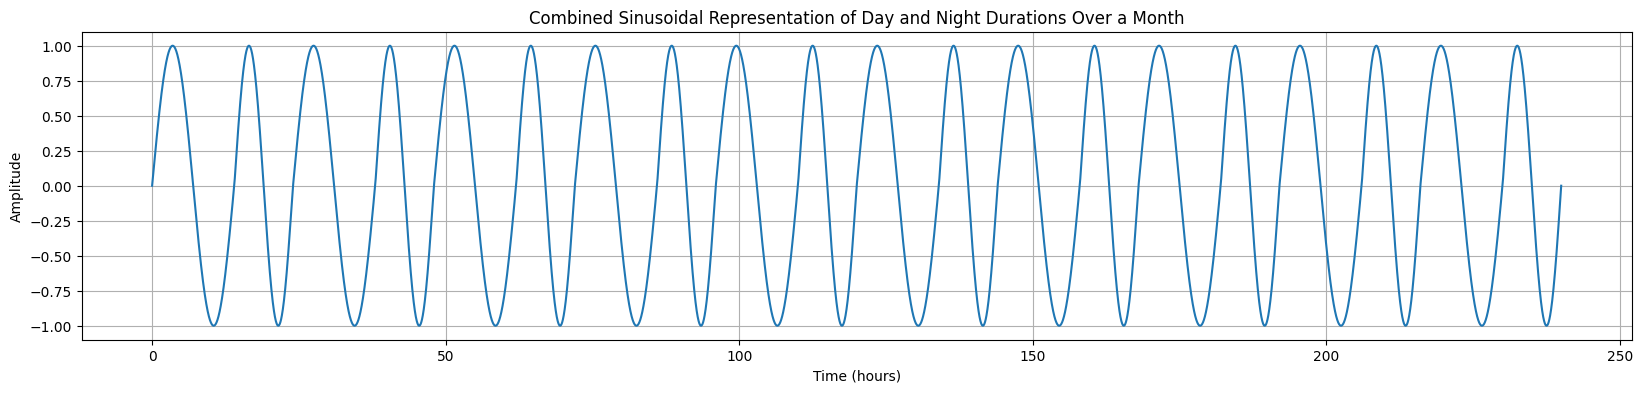

In [ ]:
# Define the time range for a month (30 days, 720 hours)
# time_month = np.linspace(0, 720, 720 * 60)  # 720 hours in a month, with 1-minute granularity
time_month = np.linspace(0, 240, 240 * 60)
# Initialize the signal array
signal_combined = np.zeros_like(time_month)

# Calculate the number of complete day/night cycles in a month
num_cycles = 240 // 24
# num_cycles = 720 // 24  # 30 complete cycles

# Generate the combined signal
for i in range(num_cycles):
    # Daytime signal for 0-14 hours of each day
    start_day = i * 24
    end_day = start_day + 14
    time_day = np.linspace(0, 14, 14 * 60)  # 14 hours of daytime
    signal_day = np.sin(2 * np.pi * freq_day * time_day)
    signal_combined[start_day * 60:end_day * 60] = signal_day

    # Nighttime signal for 14-24 hours of each day
    start_night = end_day
    end_night = (i + 1) * 24
    time_night = np.linspace(0, 10, 10 * 60)  # 10 hours of nighttime
    signal_night = np.sin(2 * np.pi * freq_night * time_night)
    signal_combined[start_night * 60:end_night * 60] = signal_night

# Plotting
plt.figure(figsize=(20, 4))
plt.plot(time_month, signal_combined, label='Combined Day and Night Signal')
plt.xlabel('Time (hours)')
plt.ylabel('Amplitude')
plt.title('Combined Sinusoidal Representation of Day and Night Durations Over a Month')
plt.grid(True)
plt.show()

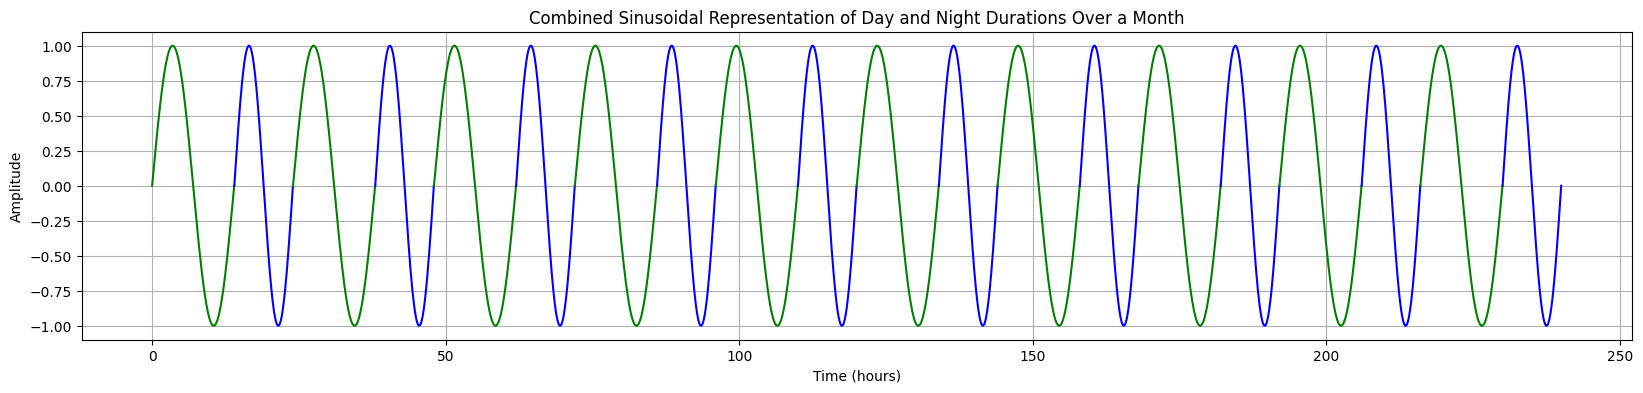

In [ ]:
# Adjusting the plot to color the day signal red and the night signal black

# Plotting with color differentiation
plt.figure(figsize=(20, 4))

# Plot each day/night cycle with appropriate colors
for i in range(num_cycles):
    # Daytime
    start_day = i * 24 * 60
    end_day = (i * 24 + 14) * 60
    plt.plot(time_month[start_day:end_day], signal_combined[start_day:end_day], 'g')  # Day signal in red

    # Nighttime
    start_night = end_day
    end_night = (i + 1) * 24 * 60
    plt.plot(time_month[start_night:end_night], signal_combined[start_night:end_night], 'b')  # Night signal in black

plt.xlabel('Time (hours)')
plt.ylabel('Amplitude')
plt.title('Combined Sinusoidal Representation of Day and Night Durations Over a Month')
plt.grid(True)
plt.show()


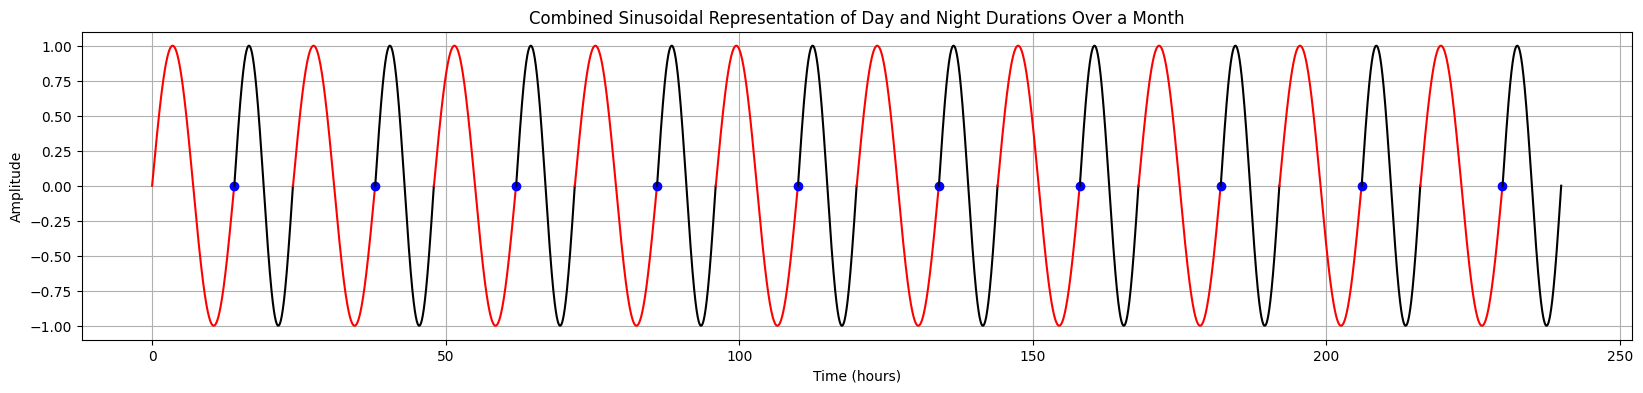

In [ ]:
# Drawing a point on the curve with a line to the axis every 14 hours on the graph

plt.figure(figsize=(20, 4))

# Plot each day/night cycle with appropriate colors and mark points every 14 hours
for i in range(num_cycles):
    # Daytime
    start_day = i * 24 * 60
    end_day = (i * 24 + 14) * 60
    plt.plot(time_month[start_day:end_day], signal_combined[start_day:end_day], 'r')  # Day signal in red
    # Mark the end of the daytime with a point and a line to the x-axis
    plt.plot((i * 24 + 14), signal_combined[end_day - 1], 'bo')  # Point marker
    plt.vlines((i * 24 + 14), ymin=0, ymax=signal_combined[end_day - 1], colors='b', linestyles='dotted')  # Line to axis

    # Nighttime
    start_night = end_day
    end_night = (i + 1) * 24 * 60
    plt.plot(time_month[start_night:end_night], signal_combined[start_night:end_night], 'k')  # Night signal in black

plt.xlabel('Time (hours)')
plt.ylabel('Amplitude')
plt.title('Combined Sinusoidal Representation of Day and Night Durations Over a Month')
plt.grid(True)
plt.show()

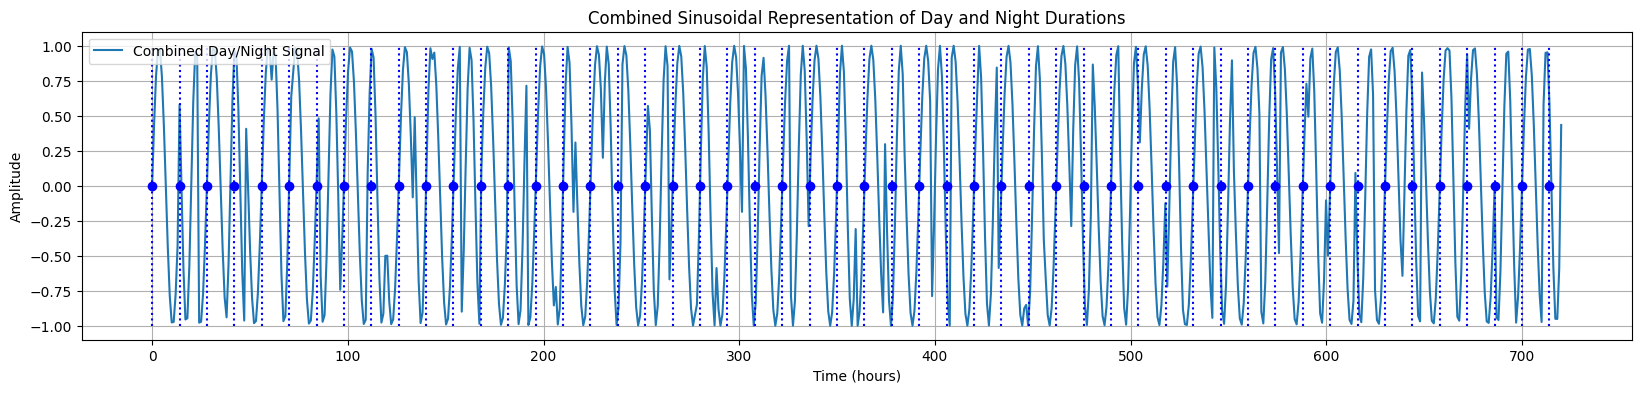

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def create_sinusoidal_signal(freq, sample_rate, duration, offset=0):
    """
    Creates a sinusoidal signal for a given frequency and duration, starting at an offset.
    """
    time_range = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    signal = np.sin(2 * np.pi * freq * (time_range + offset))
    return signal

def combine_day_night_signals(freq_day, freq_night, sample_rate, month_length):
    """
    Combines day and night signals into a single signal for a specified month length.
    """
    # Calculate durations from frequencies
    day_duration = 1 / freq_day
    night_duration = 1 / freq_night

    # Initialize time and signal arrays
    time_month = np.linspace(0, month_length, int(sample_rate * month_length))
    signal_combined = np.zeros_like(time_month)

    # Generate the signal
    cycle_duration = day_duration + night_duration
    for i, t in enumerate(time_month):
        cycle_phase = t % cycle_duration
        if cycle_phase < day_duration:
            signal_combined[i] = np.sin(2 * np.pi * freq_day * t)
        else:
            signal_combined[i] = np.sin(2 * np.pi * freq_night * t)

    return time_month, signal_combined

def plot_combined_signal(time_month, signal_combined, sample_rate, day_duration):
    """
    Plots the combined day and night signal with markers and dotted lines at specified intervals.
    """
    plt.figure(figsize=(20, 4))
    plt.plot(time_month, signal_combined, label='Combined Day/Night Signal')

    # Add markers and lines every day_duration
    for marker in np.arange(0, month_length, day_duration):
        if marker < len(time_month):
            plt.plot(marker, np.sin(2 * np.pi * freq_day * marker), 'bo')
            plt.vlines(marker, ymin=-1, ymax=1, colors='b', linestyles='dotted')

    plt.xlabel('Time (hours)')
    plt.ylabel('Amplitude')
    plt.title('Combined Sinusoidal Representation of Day and Night Durations')
    plt.grid(True)
    plt.legend()
    plt.show()

# Parameters
freq_day = 1/14  # Day frequency in hours^-1
freq_night = 1/10  # Night frequency in hours^-1
sample_rate = 1  # Samples per hour
month_length = 720  # Total hours in the period to simulate

# Generate and plot the signal
time_month, signal_combined = combine_day_night_signals(freq_day, freq_night, sample_rate, month_length)
plot_combined_signal(time_month, signal_combined, sample_rate, 1/freq_day)


## GOOD RUNS
24/3/5 03:05 gpt assisted

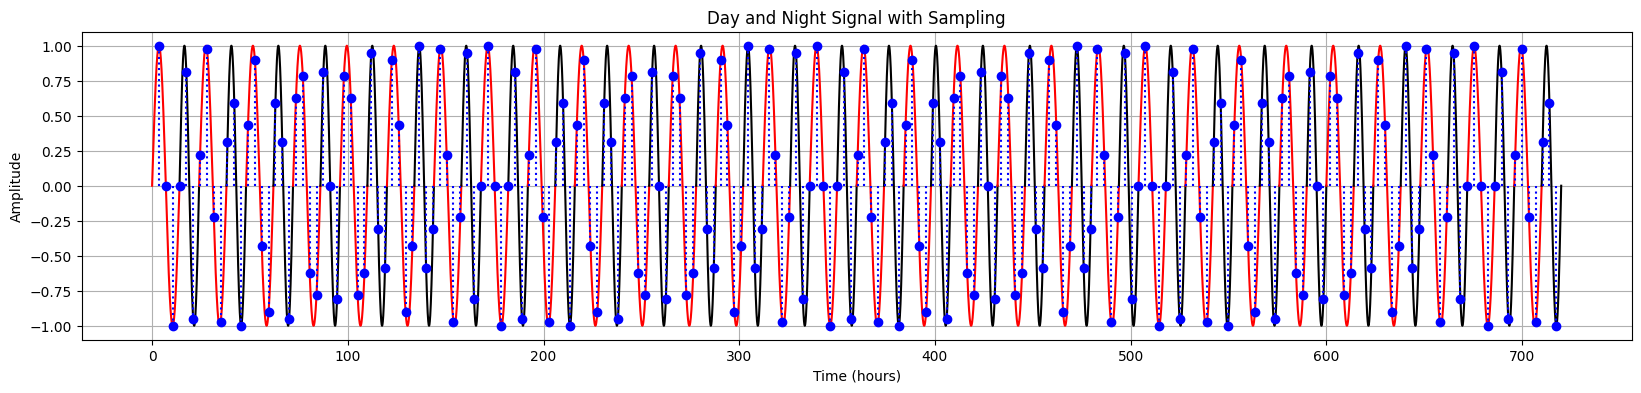

In [ ]:
def plot_day_night_cycle_with_sampling(num_cycles=30, sample_rate=3.5):
    """
    Plots a combined sinusoidal representation of day and night durations over a month,
    with points and lines to the time axis added at every specified sample rate interval, starting at t=3.5 hours.

    Parameters:
    - num_cycles: Number of 24-hour cycles to plot. Default is 30, for a typical month.
    - sample_rate: Interval in hours at which to sample the signal and plot points/lines. Default is 3.5 hours.
    """
    # Frequencies and time range definitions
    freq_day = 1/14
    freq_night = 1/10
    time_month = np.linspace(0, 720, 720 * 60)  # 720 hours in a month, with 1-minute granularity
    signal_combined = np.zeros_like(time_month)

    plt.figure(figsize=(20, 4))

    for i in range(num_cycles):
        # Calculate daytime and nighttime signals separately for each cycle
        start_day = i * 24 * 60
        end_day = (i * 24 + 14) * 60
        start_night = end_day
        end_night = (i + 1) * 24 * 60

        # Daytime signal
        time_day = np.linspace(start_day / 60, end_day / 60, (end_day - start_day))
        signal_day = np.sin(2 * np.pi * freq_day * (time_day - start_day / 60))
        plt.plot(time_day, signal_day, 'r')  # Plot each daytime in red

        # Nighttime signal
        time_night = np.linspace(start_night / 60, end_night / 60, (end_night - start_night))
        signal_night = np.sin(2 * np.pi * freq_night * (time_night - start_night / 60))
        plt.plot(time_night, signal_night, 'k')  # Plot each nighttime in black

    # Adding samples starting at t=3.5 hours, every 'sample_rate' hours across the entire month
    sample_times = np.arange(3.5, 720, sample_rate)
    for sample_time in sample_times:
        if sample_time % 24 < 14:  # During daytime
            y_value = np.sin(2 * np.pi * freq_day * (sample_time % 24))  # Calculate y-value for day
        else:  # During nighttime
            y_value = np.sin(2 * np.pi * freq_night * ((sample_time % 24) - 14))  # Calculate y-value for night

        plt.plot(sample_time, y_value, 'bo')  # Plot sample point
        plt.vlines(sample_time, ymin=0, ymax=y_value, colors='b', linestyles='dotted')  # Draw line to axis with corrected ymax

    plt.xlabel('Time (hours)')
    plt.ylabel('Amplitude')
    plt.title('Day and Night Signal with Sampling')
    plt.grid(True)
    plt.show()

# Corrected function call
plot_day_night_cycle_with_sampling(sample_rate=3.5)



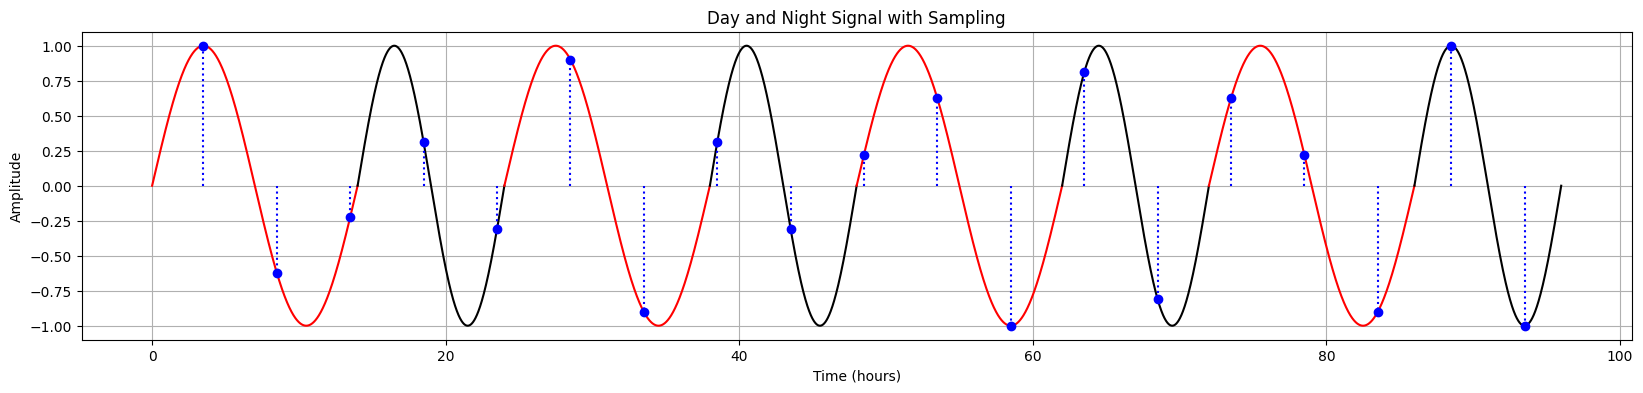

In [ ]:
def plot_day_night_cycle_with_sampling(freq_day=1/14, freq_night=1/10, total_hours=96, num_cycles=4, sample_rate=5):
    """
    Plots a combined sinusoidal representation of day and night durations over a specified time period,
    with points and lines to the time axis added at every specified sample rate interval, starting at t=3.5 hours.

    Parameters:
    - freq_day: Frequency of the day signal (hours^-1). Default is 1/14.
    - freq_night: Frequency of the night signal (hours^-1). Default is 1/10.
    - total_hours: Total duration in hours to plot. Default is 720 hours (30 days).
    - num_cycles: Number of 24-hour cycles to plot. Automatically calculated if not specified.
    - sample_rate: Interval in hours at which to sample the signal and plot points/lines. Default is 3.5 hours.
    """
    plt.figure(figsize=(20, 4))

    # Define the time range with 1-minute granularity
    time_month = np.linspace(0, total_hours, total_hours * 60)

    for i in range(num_cycles):
        # Calculations for each day/night cycle
        start_day = i * 24 * 60
        end_day = int(i * 24 + (1/freq_day)) * 60
        start_night = end_day
        end_night = (i + 1) * 24 * 60

        # Plot daytime in red
        time_day = np.linspace(start_day / 60, end_day / 60, (end_day - start_day))
        signal_day = np.sin(2 * np.pi * freq_day * (time_day - start_day / 60))
        plt.plot(time_day, signal_day, 'r')

        # Plot nighttime in black
        time_night = np.linspace(start_night / 60, end_night / 60, (end_night - start_night))
        signal_night = np.sin(2 * np.pi * freq_night * (time_night - start_night / 60))
        plt.plot(time_night, signal_night, 'k')

    # Adding samples with corrected logic for points and lines
    t0 = (1/freq_day)/4 #first point when amplitude = 1
    sample_times = np.arange(t0, total_hours, sample_rate)
    for sample_time in sample_times:
        if sample_time % 24 < (1/freq_day):
            y_value = np.sin(2 * np.pi * freq_day * (sample_time % 24))
        else:
            y_value = np.sin(2 * np.pi * freq_night * ((sample_time % 24) - (1/freq_day)))
        plt.plot(sample_time, y_value, 'bo')
        plt.vlines(sample_time, ymin=0, ymax=y_value, colors='b', linestyles='dotted')

    plt.xlabel('Time (hours)')
    plt.ylabel('Amplitude')
    plt.title('Day and Night Signal with Sampling')
    plt.grid(True)
    plt.show()

# Example call with default parameters
plot_day_night_cycle_with_sampling()


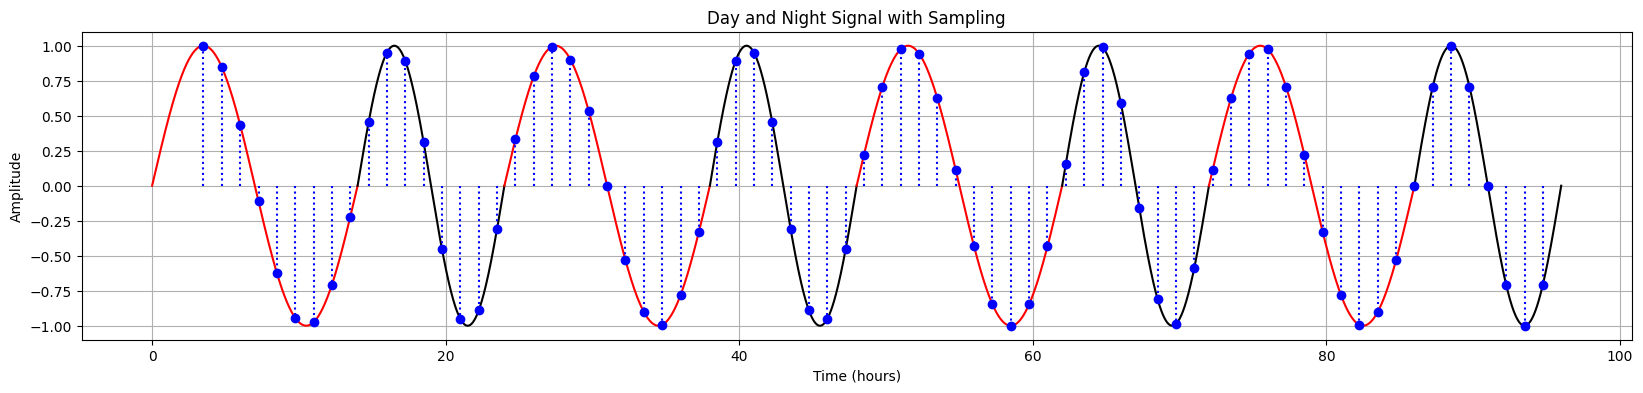

In [ ]:
plot_day_night_cycle_with_sampling(total_hours=96, sample_rate=1.25)

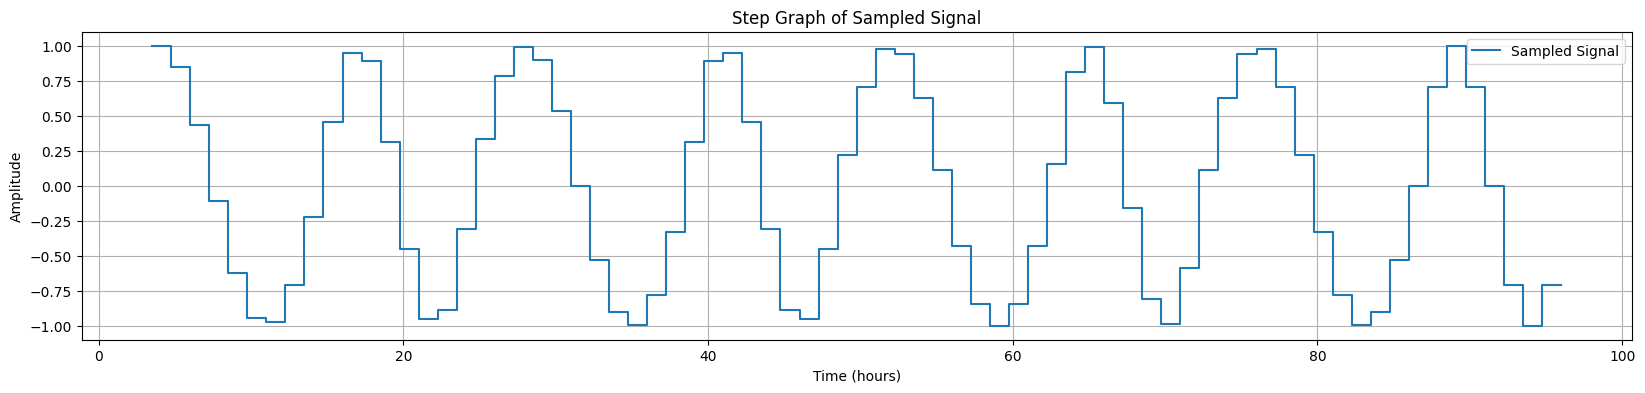

In [ ]:
def plot_sampling_step_graph(freq_day=1/14, freq_night=1/10, total_hours=96, sample_rate=1.25):
    """
    Plots a step graph of the sampling points over a specified time period, where the sampling point amplitude
    is the step height and the sample_rate is the step width for each point.

    Parameters:
    - freq_day: Frequency of the day signal (hours^-1). Default is 1/14.
    - freq_night: Frequency of the night signal (hours^-1). Default is 1/10.
    - total_hours: Total duration in hours to plot. Default is 720 hours (30 days).
    - sample_rate: Interval in hours at which to sample the signal and plot points/lines. Default is 3.5 hours.
    """
    t0 = (1/freq_day)/4 #first point when amplitude = 1
    sample_times = np.arange(t0, total_hours, sample_rate)
    sample_values = []

    for sample_time in sample_times:
        if sample_time % 24 < (1/freq_day):
            y_value = np.sin(2 * np.pi * freq_day * (sample_time % 24))
        else:
            y_value = np.sin(2 * np.pi * freq_night * ((sample_time % 24) - (1 / freq_day)))
        sample_values.append(y_value)

     # Prepare step graph data
    step_times = np.empty(2 * len(sample_times))
    step_times[0::2] = sample_times
    step_times[1::2] = sample_times + sample_rate
    step_values = np.repeat(sample_values, 2)

    plt.figure(figsize=(20, 4))
    plt.step(step_times, step_values, where='post', label='Sampled Signal')
    plt.xlabel('Time (hours)')
    plt.ylabel('Amplitude')
    plt.title('Step Graph of Sampled Signal')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example call to the function
plot_sampling_step_graph()


In [ ]:
def signals_combined(time_month):
    """
    Generates the combined signal of day and night cycles over a specified time range.

    Parameters:
    - time_month: An array of time values in hours for which to generate the signal.

    Returns:
    - A numpy array containing the combined signal of day and night cycles.
    """
    # Define frequencies based on the duration of day and night
    freq_day = 1/14  # Frequency of the day signal (hours^-1)
    freq_night = 1/10  # Frequency of the night signal (hours^-1)

    # Initialize the signal array
    signal_combined = np.zeros_like(time_month)
    num_cycles = int(time_month[-1] // 24)  # Determine number of complete cycles based on the time range

    # Generate the combined signal
    for i in range(num_cycles):
        # Daytime signal for 0-14 hours of each day
        start_day = i * 24 * 60
        end_day = (i * 24 + 14) * 60
        if end_day <= len(time_month):  # Ensure the index does not exceed the array length
            time_day = np.linspace(0, 14, 14 * 60)  # 14 hours of daytime
            signal_day = np.sin(2 * np.pi * freq_day * time_day)
            signal_combined[start_day:end_day] = signal_day

        # Nighttime signal for 14-24 hours of each day
        start_night = end_day
        end_night = (i + 1) * 24 * 60
        if end_night <= len(time_month):  # Ensure the index does not exceed the array length
            time_night = np.linspace(0, 10, 10 * 60)  # 10 hours of nighttime
            signal_night = np.sin(2 * np.pi * freq_night * time_night)
            signal_combined[start_night:end_night] = signal_night

    return signal_combined

In [ ]:
def generate_day_night_cycle_dataframe(num_cycles=30):
    """
    Generates a DataFrame containing the time and amplitude values of day and night cycles over a month.

    Parameters:
    - num_cycles: Number of 24-hour cycles to generate. Default is 30, for a typical month.

    Returns:
    - A pandas DataFrame with columns ['Time (hours)', 'Amplitude'].
    """
    # Define frequencies based on the duration of day and night
    freq_day = 1/14  # Frequency of the day signal (hours^-1)
    freq_night = 1/10  # Frequency of the night signal (hours^-1)

    # Define the time range for a month (30 days, 720 hours)
    time_month = np.linspace(0, 720, 720 * 60)  # 720 hours in a month, with 1-minute granularity

    # Initialize the signal array
    signal_combined = signals_combined(time_month)

    # Create a DataFrame from the time and amplitude values
    df = pd.DataFrame({
        'Time (hours)': time_month,
        'Amplitude': signal_combined
    })

    return df

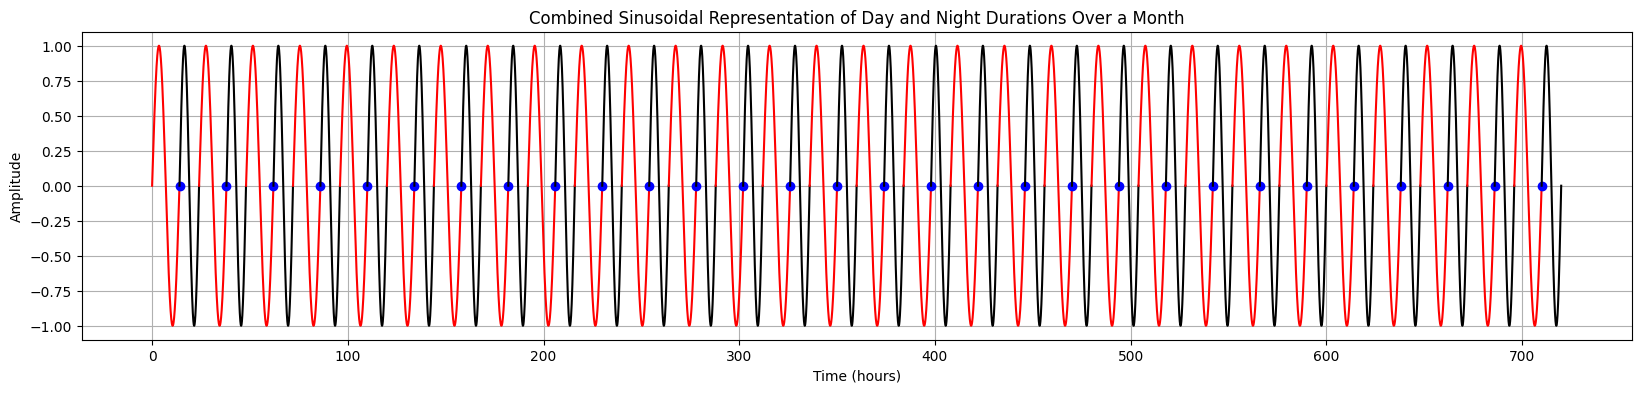

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_day_night_cycle(num_cycles=30):
    """
    Plots a combined sinusoidal representation of day and night durations over a month.

    Parameters:
    - num_cycles: Number of 24-hour cycles to plot. Default is 30, for a typical month.
    """
    # Define frequencies based on the duration of day and night
    freq_day = 1/14  # Frequency of the day signal (hours^-1)
    freq_night = 1/10  # Frequency of the night signal (hours^-1)

    # Define the time range for a month (30 days, 720 hours)
    time_month = np.linspace(0, 720, 720 * 60)  # 720 hours in a month, with 1-minute granularity

    # Initialize the signal array
    signal_combined = signals_combined(time_month)

    # Plotting with color differentiation and markers
    plt.figure(figsize=(20, 4))
    for i in range(num_cycles):
        # Daytime
        start_day = i * 24 * 60
        end_day = (i * 24 + 14) * 60
        plt.plot(time_month[start_day:end_day], signal_combined[start_day:end_day], 'r')  # Day signal in red

        # Mark the end of the daytime with a point and a line to the x-axis
        plt.plot((i * 24 + 14), signal_combined[end_day - 1], 'bo')  # Point marker
        plt.vlines((i * 24 + 14), ymin=0, ymax=signal_combined[end_day - 1], colors='b', linestyles='dotted')  # Line to axis

        # Nighttime
        start_night = end_day
        end_night = (i + 1) * 24 * 60
        plt.plot(time_month[start_night:end_night], signal_combined[start_night:end_night], 'k')  # Night signal in black

    plt.xlabel('Time (hours)')
    plt.ylabel('Amplitude')
    plt.title('Combined Sinusoidal Representation of Day and Night Durations Over a Month')
    plt.grid(True)
    plt.show()

# Example of how to call the function
plot_day_night_cycle()


In [ ]:
#gemini
import matplotlib.pyplot as plt
import numpy as np

# Define day and night frequencies
day_freq = 1 / 14  # hours
night_freq = 1 / 10  # hours

# Define time axis (24 hours)
t = np.linspace(0, 24, 1000)

# Create sinusoidal signals for day and night
day_signal = np.sin(2 * np.pi * day_freq * t)
night_signal = np.sin(2 * np.pi * night_freq * t)

# Combine day and night signals
combined_signal = day_signal + night_signal

# Plot the combined signal
plt.plot(t, combined_signal)

# Set labels and title
plt.xlabel("Time (hours)")
plt.ylabel("Signal Amplitude")
plt.title("Nyquist Demonstration: Day-Night Cycle")

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def create_sinusoidal_signal(freq, time_range):
  """
  Creates a sinusoidal signal with a given frequency over a specified time range.

  Args:
      freq: The frequency of the signal (in hours^-1).
      time_range: The time range for the signal (in hours).

  Returns:
      A numpy array containing the sinusoidal signal.
  """
  return np.sin(2 * np.pi * freq * time_range)

def combine_day_night_signals(freq_day, freq_night, sample_rate, month_length):
  """
  Combines day and night signals into a single signal for a specified month length.

  Args:
      freq_day: The frequency of the day signal (in hours^-1).
      freq_night: The frequency of the night signal (in hours^-1).
      sample_rate: The desired spacing of the data points (in hours).
      month_length: The length of the month in hours.

  Returns:
      A numpy array containing the combined signal.
  """
  time_month = np.linspace(0, month_length, int(month_length / sample_rate))
  signal_combined = np.zeros_like(time_month)

  num_cycles = int(month_length // (14 + 10))
  for i in range(num_cycles):
    # Daytime signal
    start_day = i * (14 + 10)
    end_day = start_day + 14
    time_day = np.linspace(0, 14, int(14 / sample_rate))
    signal_day = create_sinusoidal_signal(freq_day, time_day)
    signal_combined[start_day:end_day] = signal_day

    # Nighttime signal
    start_night = end_day
    end_night = start_night

  return time_month, signal_combined

def plot_combined_signal(time_month, signal_combined):
  """
  Plots the combined day and night signal with markers and dotted lines every cycle.

  Args:
      time_month: The time axis for the signal (in hours).
      signal_combined: The combined day and night signal.
  """
  plt.figure(figsize=(20, 4))

  num_cycles = len(time_month) // (14 + 10)
  for i in range(num_cycles):
    # Daytime
    start_day = i * (14 + 10)
    end_day = start_day + 14
    plt.plot(time_month[start_day:end_day], signal_combined[start_day:end_day], 'r')
    plt.plot((i * (14 + 10) + 14), signal_combined[end_day - 1], 'bo')
    plt.vlines((i * (14 + 10) + 14), ymin=0, ymax=signal_combined[end_day - 1], colors='b', linestyles='dotted')

    # Nighttime
    start_night = end_day
    end_night = start_night + 10
    plt.plot(time_month[start_night:end_night], signal_combined[start_night:end_night], 'k')

  plt.xlabel('Time (hours)')
  plt.ylabel('Amplitude')
  plt.title('Combined Sinusoidal Representation of Day and Night Durations Over a Month')
  plt.grid(True)
  plt.show()

# Get user input
day_freq = float(input("Enter the day frequency (hours^-1): "))
night_freq = float(input("Enter the night frequency (hours^-1): "))
sample_rate = float(input("Enter the desired sample rate (hours): "))
month_length = int(input("Enter the month length (hours): "))

# Generate and plot the signal
time_month, signal_combined = combine_day_night_signals(day_freq, night_freq, sample_rate, month_length)
plot_combined_signal(time_month, signal_combined)
